# 1. Missing Data & Aggregations

In [36]:
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

print(f"{random_matrix.size = }")

random_matrix = np.random.randint(1,10, (size,size))
index = np.random.choice(random_matrix.size, 10, replace=False)      # random värden mellan 0-64, om replace = ("true"), vid replace=False blir dubbletter ok

print(f"{index = }")
print(random_matrix)

# komma åt ett tal, 5,3 x = 5, y = 3, når "5"

random_matrix[5,3] = 999
random_matrix

NameError: name 'random_matrix' is not defined

In [ ]:
from random import random
import pandas as pd
import numpy as np

np.random.seed(1337)
size = 8

print(f"{random_matrix.size = }")

random_matrix = np.random.randint(1,10, (size,size))
index = np.random.choice(random_matrix.size, 10, replace=False)      # random värden mellan 0-64, om replace = ("true"), vid replace=False blir dubbletter ok

print(f"{index = }")
# print(random_matrix)

# komma åt ett tal, 5,3 x = 5, y = 3, når "5"

# random_matrix[5,3] = 999

random_matrix = random_matrix*1.        # converts to int

random_matrix.ravel()[index] = None

random_matrix

random_matrix.size = 64
index = array([28, 42, 17, 49, 53, 31, 35,  2, 13, 62])


array([[ 8.,  9., nan,  8.,  3.,  3.,  5.,  9.],
       [ 7.,  7.,  8.,  9.,  2., nan,  7.,  3.],
       [ 3., nan,  2.,  8.,  4.,  2.,  4.,  4.],
       [ 5.,  9.,  9.,  8., nan,  2.,  7., nan],
       [ 5.,  3.,  6., nan,  5.,  3.,  4.,  3.],
       [ 5.,  9., nan,  4.,  9.,  9.,  8.,  5.],
       [ 4., nan,  2.,  3.,  1., nan,  9.,  3.],
       [ 2.,  1.,  2.,  5.,  3.,  1., nan,  8.]])

In [ ]:
scores = pd.DataFrame(
    random_matrix, 
    index = [f"Player {i}" for i in range(1, size+1)], 
    columns = [f"Round {i}" for i in range(1, size + 1)],
)

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,NaN,8.0


## 1.1 Missing Data

Ta bort data om man har stora mängder, alternativt kan man räkma ut exempelvis medianen och ta ut "simulerad data" Ex NAN för player 8

In [ ]:
scores.isnull() # True when its false, aka true = not a number

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,True,False,False,False,False,False
Player 2,False,False,False,False,False,True,False,False
Player 3,False,True,False,False,False,False,False,False
Player 4,False,False,False,False,True,False,False,True
Player 5,False,False,False,True,False,False,False,False
Player 6,False,False,True,False,False,False,False,False
Player 7,False,True,False,False,False,True,False,False
Player 8,False,False,False,False,False,False,True,False


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  8 non-null      float64
 1   Round 2  6 non-null      float64
 2   Round 3  6 non-null      float64
 3   Round 4  7 non-null      float64
 4   Round 5  7 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  7 non-null      float64
 7   Round 8  7 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [ ]:
scores.dropna() # slänger allt, scores har "not a number" på alla rader

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8


In [ ]:
scores.loc["Player 8"]      # locks player 8, and prints out player 8

Round 1    2.0
Round 2    1.0
Round 3    2.0
Round 4    5.0
Round 5    3.0
Round 6    1.0
Round 7    NaN
Round 8    8.0
Name: Player 8, dtype: float64

In [ ]:
scores.loc["Player 8"]["Round 7"] = 4           # lägger till 4 på round 7

In [ ]:
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,NaN,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,NaN,7.0,3.0
Player 3,3.0,NaN,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,NaN,2.0,7.0,NaN
Player 5,5.0,3.0,6.0,NaN,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,NaN,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,NaN,2.0,3.0,1.0,NaN,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [ ]:
scores.dropna(axis = "columns")     # droppar kolumner
# NaN -> Not a number
# None -> 
# Null -> missing value
# not persistent, "inplace" to mutate

# scores.dropna(axis = "columns", inplace = True) , ändrar värdet

# namge variabler eller mutera orginallet om de ska användas igen

,Round 1,Round 7
Player 1,8.0,5.0
Player 2,7.0,7.0
Player 3,3.0,4.0
Player 4,5.0,7.0
Player 5,5.0,4.0
Player 6,5.0,8.0
Player 7,4.0,9.0
Player 8,2.0,4.0


In [ ]:
scores.fillna(0, inplace = True)        # fills NA , muterad, skriver 0 på alla NAN
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,8.0,9.0,0.0,8.0,3.0,3.0,5.0,9.0
Player 2,7.0,7.0,8.0,9.0,2.0,0.0,7.0,3.0
Player 3,3.0,0.0,2.0,8.0,4.0,2.0,4.0,4.0
Player 4,5.0,9.0,9.0,8.0,0.0,2.0,7.0,0.0
Player 5,5.0,3.0,6.0,0.0,5.0,3.0,4.0,3.0
Player 6,5.0,9.0,0.0,4.0,9.0,9.0,8.0,5.0
Player 7,4.0,0.0,2.0,3.0,1.0,0.0,9.0,3.0
Player 8,2.0,1.0,2.0,5.0,3.0,1.0,4.0,8.0


In [ ]:
# CSV , Comma Seperated Values
# survived, test, alive
# 10,1,4

## 1.2 Missing Data - Strategy

In [ ]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


varje kolumn är nyckel till panda series

In [ ]:
type(titanic["survived"])

pandas.core.series.Series

In [ ]:
titanic["survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
titanic["survived"].value_counts()      # räknar antalet 0:or och 1:or

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic["pclass"].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [ ]:
titanic.describe()      

# numerical columns

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nans = titanic.isnull()
nans

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
nans = titanic.isnull().head()      # head(), första 5 raderna
nans

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
nans = titanic.isnull().sum()       # Visar antalet null, missing value 177 ålder. 
nans

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
sns.histplot(data = titanic, x = "age", hue = "sex", kde=True)      # Konoel Density 

NameError: name 'sns' is not defined

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 1.3.1 Case

The historian (domain expert) advices us to use median age of corresponding gender to fill in missing ages

In [ ]:
titanic["sex"] == "male"        # true or false if its man or not

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: sex, Length: 891, dtype: bool

In [ ]:
titanic[titanic["sex"] == "male"]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
males = titanic[titanic["sex"] == "male"]["age"]    # filterar till alla män, tar sedan ut alla , ger medianen på männ

In [ ]:
median_males_age = titanic[titanic["sex"] == "male"]["age"].median()      # filterar till alla män, tar sedan ut alla , ger medianen på männ
median_females_age = titanic[titanic["sex"] == "female"]["age"].median()

median_males_age, median_females_age        # median age på männ o kvinnor

(29.0, 27.0)

TODO: Use "who" category and find median

In [ ]:
titanic.loc[titanic["sex"] == "male", "age"]   # .loc , locate

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [ ]:
titanic.loc[titanic["sex"] == "male", "age"].fillna(median_males_age)       # it not a number, recives the median age

0      22.0
4      35.0
5      29.0
6      54.0
7       2.0
       ... 
883    28.0
884    25.0
886    27.0
889    26.0
890    32.0
Name: age, Length: 577, dtype: float64

In [ ]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_males_age)
titanic.loc[titanic["age"] == 29, "sex"].value_counts()
# titanic.loc[titanic["sex"] == "female", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_males_age)

male      137
female     60
Name: sex, dtype: int64

In [ ]:
titanic["age"].isnull().sum()

0

In [ ]:
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()

Series([], Name: sex, dtype: int64)

In [ ]:
titanic["age"] = titanic["age"].fillna(median_females_age)
titanic.isnull().sum()["sex"]

0

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

<AxesSubplot: xlabel='age', ylabel='Count'>

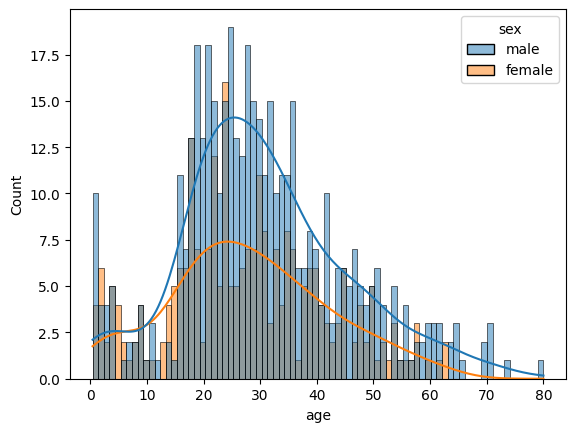

In [ ]:
sns.histplot(data = titanic, x = "age", kde = True, hue = "sex", bins = 80)

## 1.4 Aggregations

Summarazing data
- sum()
- mean()
- median()
- max()
- (min)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# TODO: examine this deprecation with numeric_only
survivors = titanic.groupby("sex").mean(numeric_only = True)[["survived", "age"]]
survivors

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.726645


In [ ]:
survived_females_precentage = 100*survivors.loc["female", "survived"]
survived_male_precentage = 100*survivors.loc["male", "survived"]

print(f"Precentage of females that survived {survived_females_precentage:.1f}%")
print(f"Precentage of males that survived {survived_male_precentage:.1f}%")

Precentage of females that survived 74.2%
Precentage of males that survived 18.9%


In [ ]:
survivors["survived"].sum()

0.9309463621410987

In [ ]:
titanic.groupby("class")[["age", "fare"]].max()

,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [ ]:
titanic.groupby("class")[["age", "fare"]].min()

,age,fare
class,,
First,0.92,0.0
Second,0.67,0.0
Third,0.42,0.0


<AxesSubplot: xlabel='pclass', ylabel='sex'>

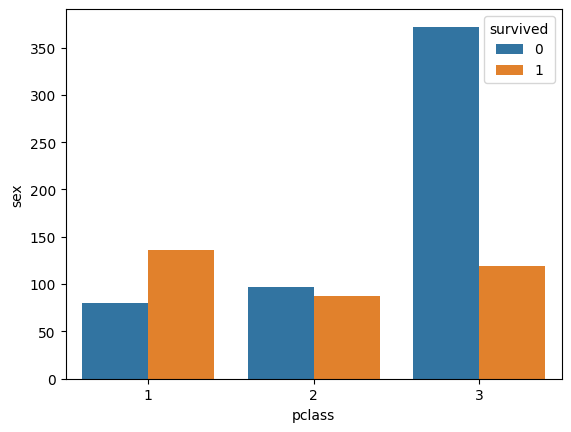

In [ ]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()

sns.barplot(data = survived_class, x = "pclass", y = "sex", hue = "survived")

In [ ]:
import plotly_express as px
print(px)

gapminder = px.data.gapminder()
gapminder.head()

<module 'plotly_express' from 'c:\\Users\\hh894\\.virtualenvs\\Databehandling-Hannes-Hedberg-8dsvo99R\\lib\\site-packages\\plotly_express\\__init__.py'>


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [ ]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


In [ ]:
gapminder.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1704.0,1.979500e+03,1.726533e+01,1952.000000,1.965750e+03,1.979500e+03,1.993250e+03,2.007000e+03
lifeExp,1704.0,5.947444e+01,1.291711e+01,23.599000,4.819800e+01,6.071250e+01,7.084550e+01,8.260300e+01
pop,1704.0,2.960121e+07,1.061579e+08,60011.000000,2.793664e+06,7.023596e+06,1.958522e+07,1.318683e+09
gdpPercap,1704.0,7.215327e+03,9.857455e+03,241.165876,1.202060e+03,3.531847e+03,9.325462e+03,1.135231e+05
iso_num,1704.0,4.258803e+02,2.483057e+02,4.000000,2.080000e+02,4.100000e+02,6.380000e+02,8.940000e+02


In [ ]:
gapminder["country"].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [ ]:
gapminder["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [37]:
# plot out nordic country
gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])

0       False
1       False
2       False
3       False
4       False
        ...  
1699    False
1700    False
1701    False
1702    False
1703    False
Name: country, Length: 1704, dtype: bool

In [38]:
gapminder["country"].value_counts()

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [39]:
# plot out nordic country
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
408,Denmark,Europe,1952,70.780,4334000,9692.385245,DNK,208
409,Denmark,Europe,1957,71.810,4487831,11099.659350,DNK,208
410,Denmark,Europe,1962,72.350,4646899,13583.313510,DNK,208
411,Denmark,Europe,1967,72.960,4838800,15937.211230,DNK,208
412,Denmark,Europe,1972,73.470,4991596,18866.207210,DNK,208
413,Denmark,Europe,1977,74.690,5088419,20422.901500,DNK,208
414,Denmark,Europe,1982,74.630,5117810,21688.040480,DNK,208
415,Denmark,Europe,1987,74.800,5127024,25116.175810,DNK,208
416,Denmark,Europe,1992,75.330,5171393,26406.739850,DNK,208
417,Denmark,Europe,1997,76.110,5283663,29804.345670,DNK,208


In [40]:
# plot out nordic country
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic["year"] == 2007

408     False
409     False
410     False
411     False
412     False
413     False
414     False
415     False
416     False
417     False
418     False
419      True
516     False
517     False
518     False
519     False
520     False
521     False
522     False
523     False
524     False
525     False
526     False
527      True
684     False
685     False
686     False
687     False
688     False
689     False
690     False
691     False
692     False
693     False
694     False
695      True
1140    False
1141    False
1142    False
1143    False
1144    False
1145    False
1146    False
1147    False
1148    False
1149    False
1150    False
1151     True
1464    False
1465    False
1466    False
1467    False
1468    False
1469    False
1470    False
1471    False
1472    False
1473    False
1474    False
1475     True
Name: year, dtype: bool

In [41]:
# plot out nordic country
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic[nordic["year"] == 2007]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
419,Denmark,Europe,2007,78.332,5468120,35278.41874,DNK,208
527,Finland,Europe,2007,79.313,5238460,33207.08440,FIN,246
695,Iceland,Europe,2007,81.757,301931,36180.78919,ISL,352
1151,Norway,Europe,2007,80.196,4627926,49357.19017,NOR,578
1475,Sweden,Europe,2007,80.884,9031088,33859.74835,SWE,752


In [43]:
# plot out nordic country
nordic = gapminder[gapminder["country"].isin(["Sweden", "Norway", "Iceland", "Denmark", "Finland"])]
nordic2007 = nordic[nordic["year"] == 2007]
nordic2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
419,Denmark,Europe,2007,78.332,5468120,35278.41874,DNK,208
527,Finland,Europe,2007,79.313,5238460,33207.08440,FIN,246
695,Iceland,Europe,2007,81.757,301931,36180.78919,ISL,352
1151,Norway,Europe,2007,80.196,4627926,49357.19017,NOR,578
1475,Sweden,Europe,2007,80.884,9031088,33859.74835,SWE,752


In [46]:
sweden = gapminder[gapminder["country"] == "Sweden"]
sweden

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1464,Sweden,Europe,1952,71.860,7124673,8527.844662,SWE,752
1465,Sweden,Europe,1957,72.490,7363802,9911.878226,SWE,752
1466,Sweden,Europe,1962,73.370,7561588,12329.441920,SWE,752
1467,Sweden,Europe,1967,74.160,7867931,15258.296970,SWE,752
1468,Sweden,Europe,1972,74.720,8122293,17832.024640,SWE,752
1469,Sweden,Europe,1977,75.440,8251648,18855.725210,SWE,752
1470,Sweden,Europe,1982,76.420,8325260,20667.381250,SWE,752
1471,Sweden,Europe,1987,77.190,8421403,23586.929270,SWE,752
1472,Sweden,Europe,1992,78.160,8718867,23880.016830,SWE,752
1473,Sweden,Europe,1997,79.390,8897619,25266.594990,SWE,752


In [47]:
sweden = nordic[nordic["country"] == "Sweden"]
sweden

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1464,Sweden,Europe,1952,71.860,7124673,8527.844662,SWE,752
1465,Sweden,Europe,1957,72.490,7363802,9911.878226,SWE,752
1466,Sweden,Europe,1962,73.370,7561588,12329.441920,SWE,752
1467,Sweden,Europe,1967,74.160,7867931,15258.296970,SWE,752
1468,Sweden,Europe,1972,74.720,8122293,17832.024640,SWE,752
1469,Sweden,Europe,1977,75.440,8251648,18855.725210,SWE,752
1470,Sweden,Europe,1982,76.420,8325260,20667.381250,SWE,752
1471,Sweden,Europe,1987,77.190,8421403,23586.929270,SWE,752
1472,Sweden,Europe,1992,78.160,8718867,23880.016830,SWE,752
1473,Sweden,Europe,1997,79.390,8897619,25266.594990,SWE,752


In [50]:
sweden.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1464,Sweden,Europe,1952,71.86,7124673,8527.844662,SWE,752
1465,Sweden,Europe,1957,72.49,7363802,9911.878226,SWE,752
1466,Sweden,Europe,1962,73.37,7561588,12329.441920,SWE,752
1467,Sweden,Europe,1967,74.16,7867931,15258.296970,SWE,752
1468,Sweden,Europe,1972,74.72,8122293,17832.024640,SWE,752


## 2.1 Bar Chart

In [51]:
fig = px.bar(sweden, x = "year", y = "pop")
fig.show()